# Heart Disease Dataset

Data source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Original original data source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Copied from above sources:

`age........` age

`sex........` 0 for female, 1 for male

`cp.........` chest pain type:
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic 

`trestbps...` resting blood pressure

`chol.......` serum cholesterol in mg/dl

`fbs........` fasting blood sugar > 120 mg/dl

`restecg....` resting electrocardiographic results (values 0, 1, 2)

`thalach....` maximum heart rate achieved

`exang......` exercise induced angina

`oldpeak....` ST depression induced by exercise relative to rest

`slope......` the slope of the peak exercise ST segment

`ca.........` number of major vessels (0-3) colored by flourosopy

`thal.......` 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE

In [2]:
# Give all plots better sizing in Jupyter notebooks
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Look at data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


An important thing to note from the data is that the target classes are fairly well-balanced. 54% of the rows are target class 1 and the remainder are target class 2.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# One-hot encode the 'cp' column and drop the first dummy column
#cp_dummies = pd.get_dummies(df['cp'], prefix='cp', drop_first=True)

# Join dummies to the main dataframe
#df.drop('cp', axis=1, inplace=True)

#df = df.join(cp_dummies)

In [8]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [9]:
# Create feature & target set
features = df.drop('target', axis=1)
target = df['target']

In [10]:
sns.pairplot(features)
plt.show()

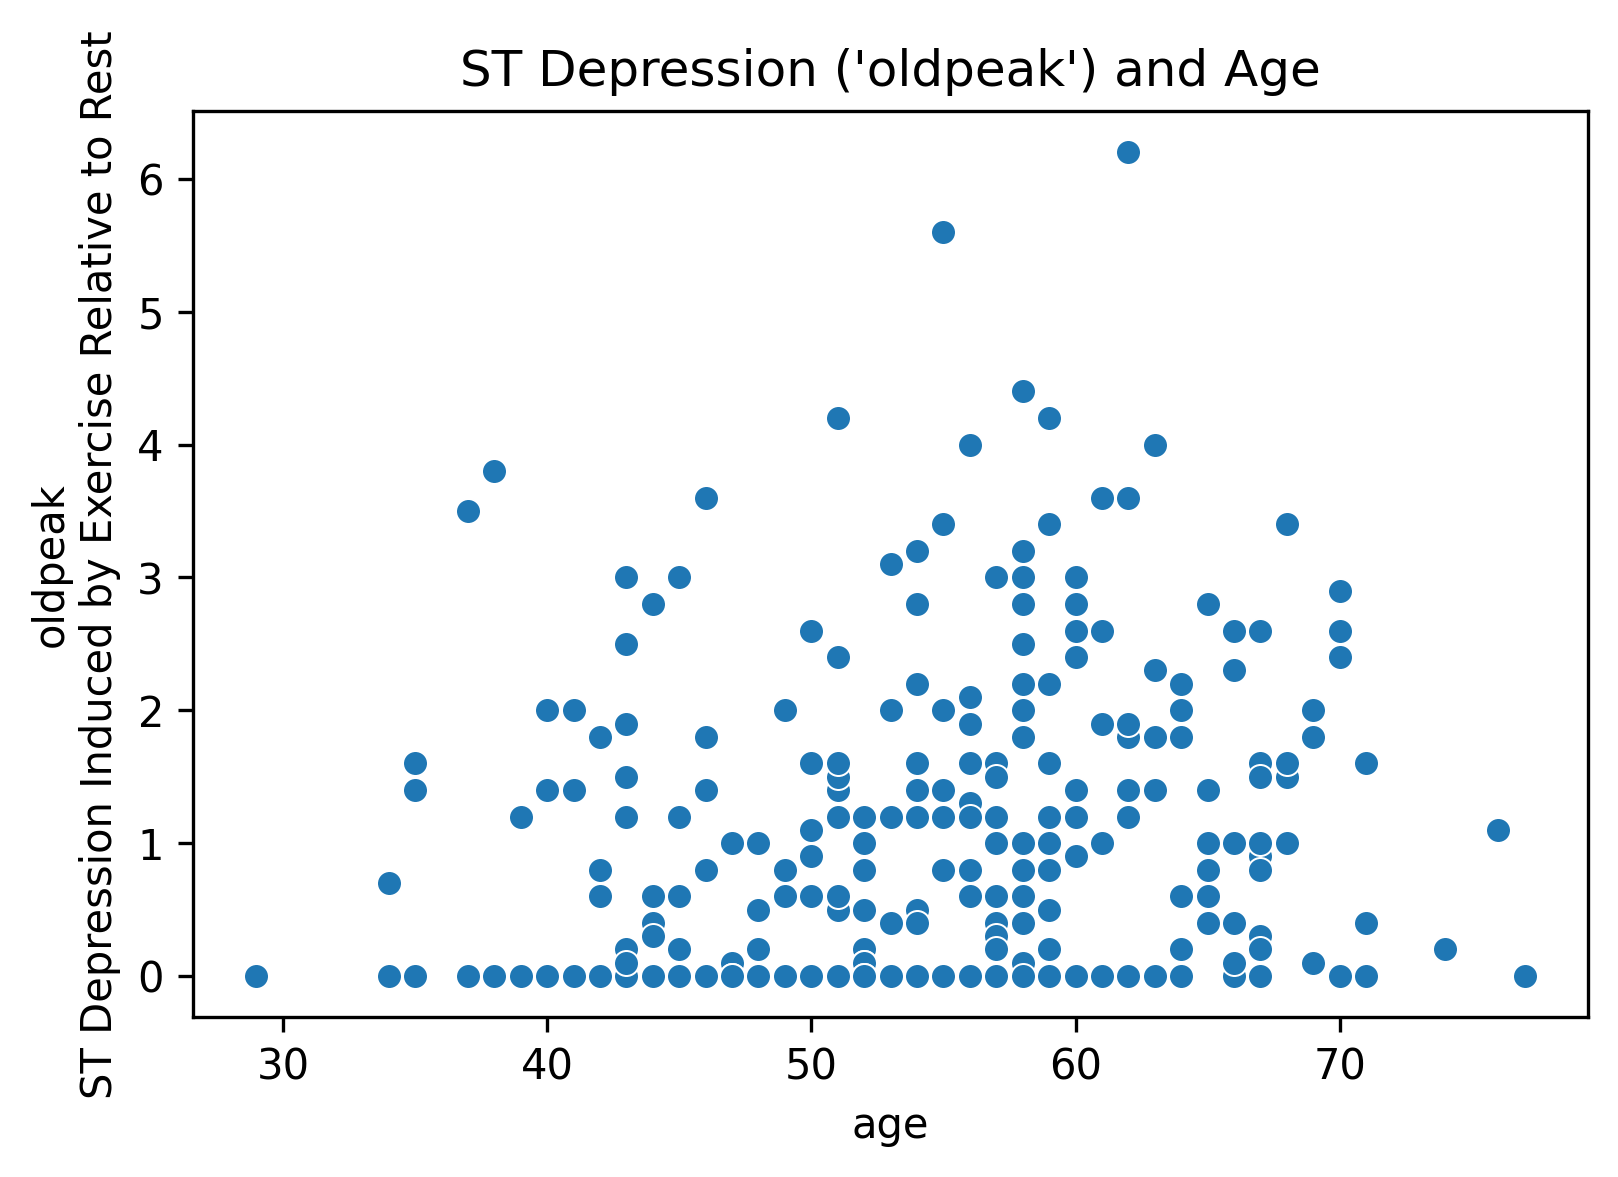

In [11]:
sns.scatterplot(data=df, y='oldpeak', x='age')
plt.title('ST Depression (\'oldpeak\') and Age')
plt.ylabel('oldpeak\nST Depression Induced by Exercise Relative to Rest')
plt.show()

The `oldpeak` column looks like it has a lot of data points pressed against the axis, which may be missing data imputed as zeroes.

Referring to the features legend at the top of the notebook, `oldpeak` represents the ST depression induced by exercise relative to rest. Values of 0 could be legitimate measurements.

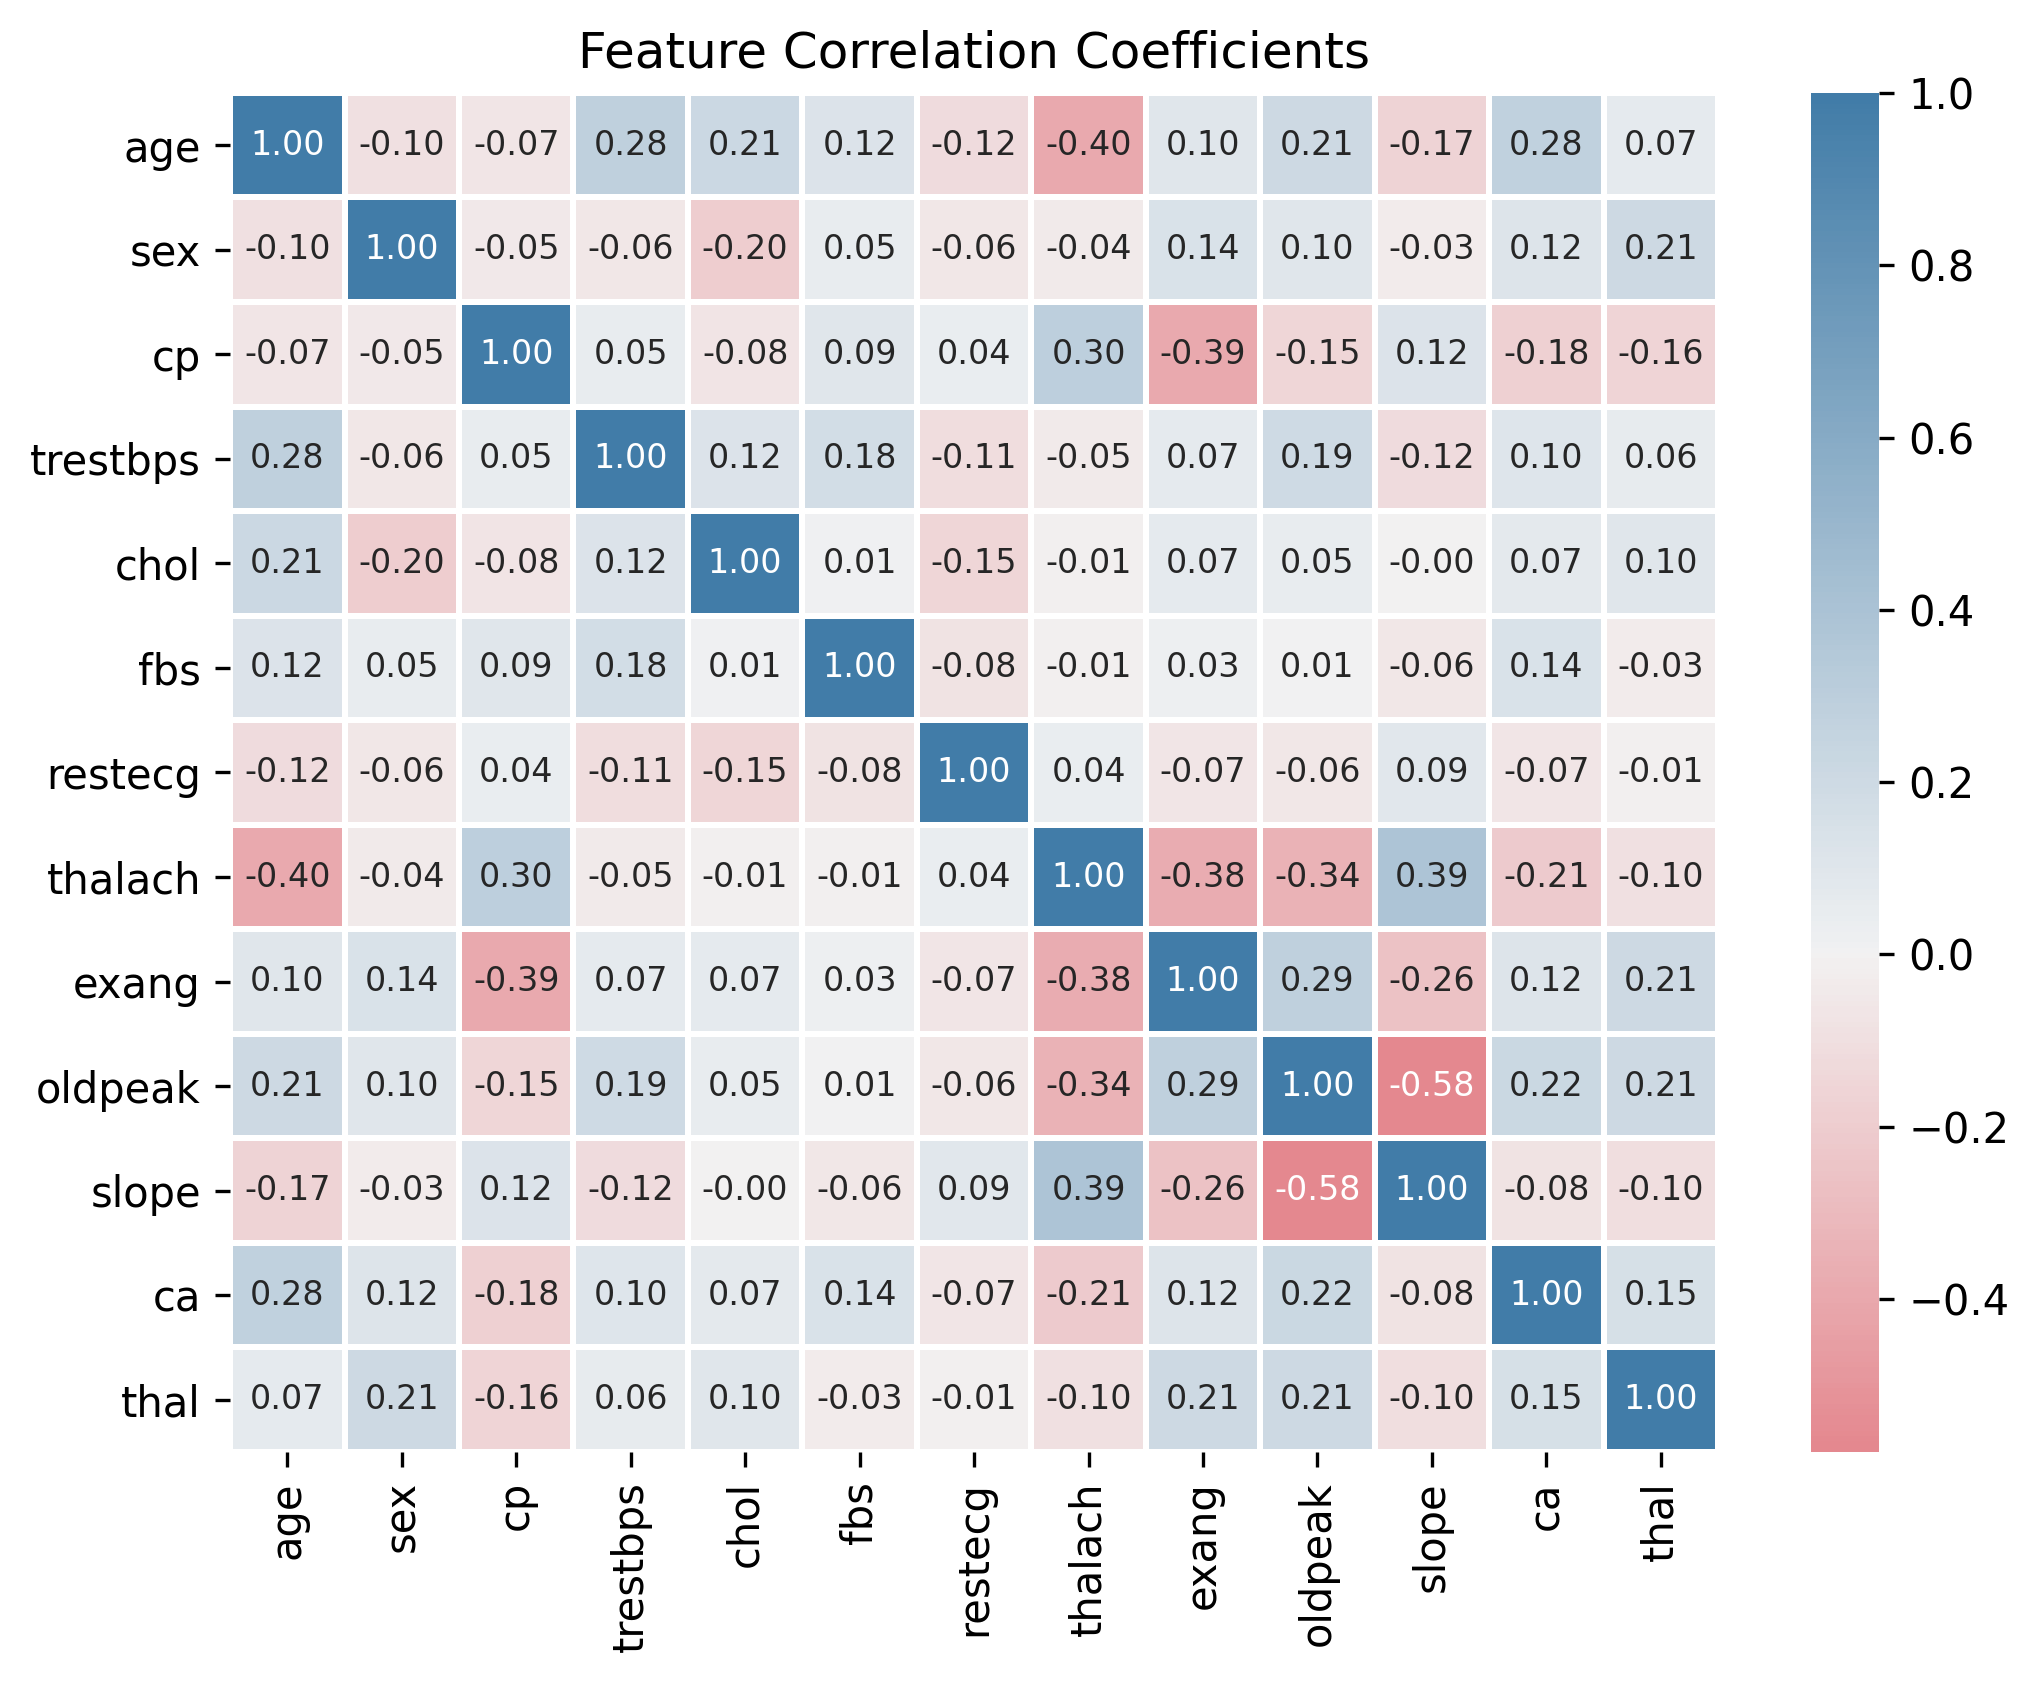

In [12]:
# Create boolean mask so we can eliminate the redundant heatmap values
mask = np.triu(np.ones_like(features.corr(), dtype=bool))

# Create heatmap
cmap = sns.diverging_palette(10, 240, as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(features.corr(),
            cmap=cmap,
            #mask=mask,
            center=0,
            linewidths=1,
            annot=True,
            annot_kws={'size': 8},
            fmt='.2f')
plt.yticks(rotation=0)
plt.title('Feature Correlation Coefficients')

plt.show()

The most strongly correlated features (either positively or negatively) are `oldpeak` and `slope`, which measure characteristics of the ST segment/depression on an ECG.

The feature `thalach` has many of the stronger positive/negative correlations with other features.

**Feature selection:** If any of the feature relationships on the heatmap had a correlation coefficient of 1 (or close to it), one of the two features could be dropped since it would add no new information. However, none of the feature relationships in this meet this criteria.

# Logistic Regression

In [13]:
# Set random seed for model generation
seed = 1234

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=seed)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

In [14]:
# Create logistic regression model using standardized feature data
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)
y_pred = lr.predict(X_test_std)

target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

original_lr_metrics = []

original_lr_metrics.append(cross_val_score(lr, X_test_std, y_test, scoring='accuracy').mean())
original_lr_metrics.append(cross_val_score(lr, X_test_std, y_test, scoring='recall').mean())
original_lr_metrics.append(cross_val_score(lr, X_test_std, y_test, scoring='precision').mean())
original_lr_metrics.append(cross_val_score(lr, X_test_std, y_test, scoring='roc_auc').mean())

print('-' * 80, '\n')
print('Cross-validated metrics:')
print('Accuracy:', cross_val_score(lr, X_test_std, y_test, scoring='accuracy').mean())
print('Recall:', cross_val_score(lr, X_test_std, y_test, scoring='recall').mean())
print('Precision:', cross_val_score(lr, X_test_std, y_test, scoring='precision').mean())
print('ROC AUC:', cross_val_score(lr, X_test_std, y_test, scoring='roc_auc').mean())

              precision    recall  f1-score   support

     Class 0       0.71      0.72      0.72        40
     Class 1       0.78      0.76      0.77        51

    accuracy                           0.75        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91

-------------------------------------------------------------------------------- 

Cross-validated metrics:
Accuracy: 0.7584795321637426
Recall: 0.86
Precision: 0.7662878787878789
ROC AUC: 0.8170454545454546


In [15]:
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [16]:
class_0_acc = 29 / (29 + 11)
class_1_acc = 39 / (12 + 39)

print('Class 0 accuracy:', class_0_acc)
print('Class 1 accuracy:', class_1_acc)

Class 0 accuracy: 0.725
Class 1 accuracy: 0.7647058823529411


In [17]:
# Look at the feature coefficients to see if any are unimportant in the model
lr_features_coefs = dict(zip(features.columns, abs(lr.coef_[0])))

print(lr_features_coefs)

{'age': 0.05925427113846475, 'sex': 0.8706753299512953, 'cp': 0.8556225709967594, 'trestbps': 0.4900382182361927, 'chol': 0.2163619258049055, 'fbs': 0.014601025480507623, 'restecg': 0.3202640243872151, 'thalach': 0.37302022775780597, 'exang': 0.5841523216812665, 'oldpeak': 0.5287286101207135, 'slope': 0.5716724585197316, 'ca': 1.07065608649677, 'thal': 0.4579782126685281}


This is hard to read. Let's put it in a DataFrame and sort the values.

In [18]:
lr_coefs_df = pd.DataFrame({'feature': list(features.columns),
                            'coef': list(lr.coef_[0])})

lr_coefs_df['coef_abs'] = lr_coefs_df['coef'].abs()

print(lr_coefs_df.sort_values(by='coef_abs', ascending=False))

     feature      coef  coef_abs
11        ca -1.070656  1.070656
1        sex -0.870675  0.870675
2         cp  0.855623  0.855623
8      exang -0.584152  0.584152
10     slope  0.571672  0.571672
9    oldpeak -0.528729  0.528729
3   trestbps -0.490038  0.490038
12      thal -0.457978  0.457978
7    thalach  0.373020  0.373020
6    restecg  0.320264  0.320264
4       chol -0.216362  0.216362
0        age -0.059254  0.059254
5        fbs -0.014601  0.014601


We can now try creating the logistic regression model without less important features and see how it affects the model accuracy.

In [19]:
# Use recursive feature elimination to see if features can be eliminated

# Try 2 to 13 features
rfe_feature_nums = [i for i in range(2, len(features.columns))]

# List to store metric values
rfe_acc = []
rfe_roc = []
rfe_prec = []
rfe_recall = []

# RFE for different number of features
for i in rfe_feature_nums:
    # RFE with 5-fold cross-validation
    rfe = RFE(estimator=LogisticRegression(),
              n_features_to_select=i)
    rfe.fit(X_train_std, y_train)
    rfe_acc.append(cross_val_score(rfe, X_test_std, y_test, scoring='accuracy').mean())
    rfe_roc.append(cross_val_score(rfe, X_test_std, y_test, scoring='roc_auc').mean())
    rfe_prec.append(cross_val_score(rfe, X_test_std, y_test, scoring='precision').mean())
    rfe_recall.append(cross_val_score(rfe, X_test_std, y_test, scoring='recall').mean())

In [20]:
for i in range(12):
    print(f'{i} features removed: {(rfe_acc[-i] + rfe_roc[-i] + rfe_prec[-i] + rfe_recall[-i]) / 4}')

0 features removed: 0.7146857965520892
1 features removed: 0.801078216374269
2 features removed: 0.8017032163742689
3 features removed: 0.7904405901116426
4 features removed: 0.7992600345560871
5 features removed: 0.7965895800106325
6 features removed: 0.8045946305156831
7 features removed: 0.8019809941520467
8 features removed: 0.7893221690590111
9 features removed: 0.7935330276448697
10 features removed: 0.7750812272522799
11 features removed: 0.7146857965520892


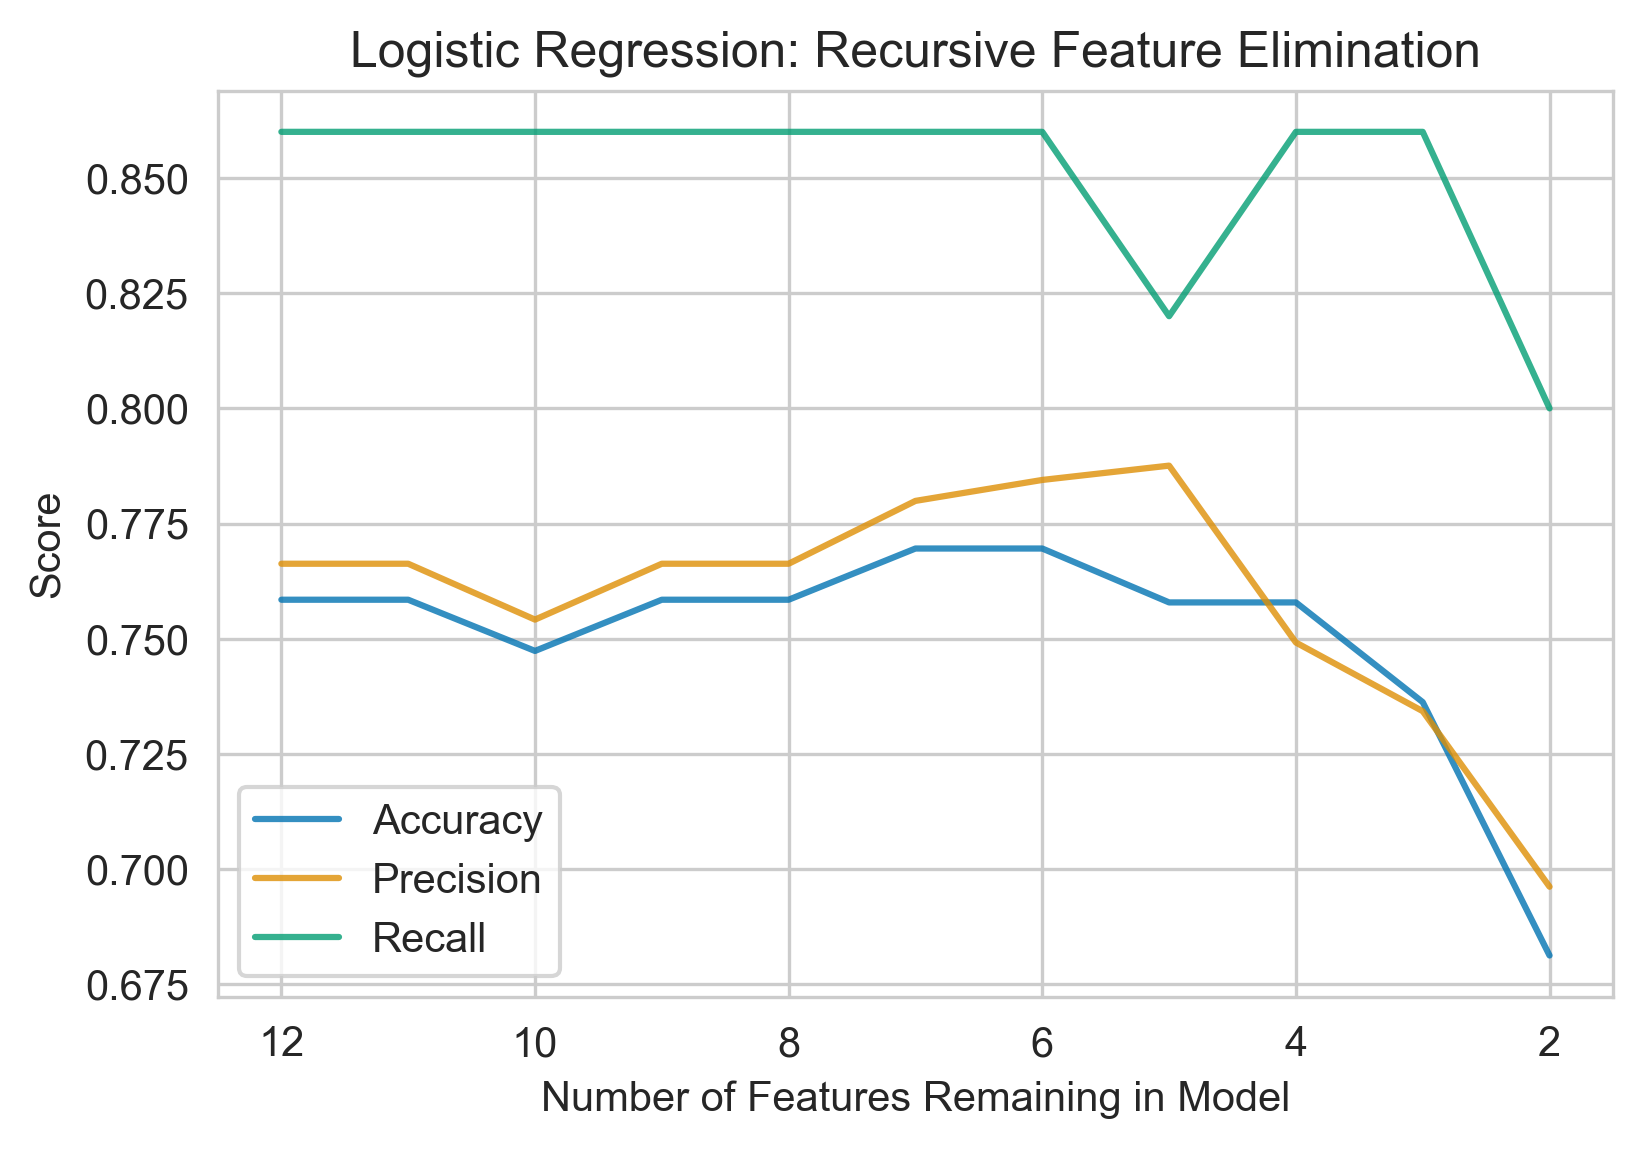

In [35]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots()
plt.plot(rfe_feature_nums, rfe_acc, label='Accuracy', alpha=0.8)
#plt.plot(rfe_feature_nums, rfe_roc, label='ROC AUC', alpha=0.8)
plt.plot(rfe_feature_nums, rfe_prec, label='Precision', alpha=0.8)
plt.plot(rfe_feature_nums, rfe_recall, label='Recall', alpha=0.8)
ax.invert_xaxis()
plt.title('Logistic Regression: Recursive Feature Elimination')
plt.ylabel('Score')
plt.xlabel('Number of Features Remaining in Model')
plt.legend()
plt.show()

RFE suggests that we can reduce the model to 5 features without losing much in the way of our metrics.

In [22]:
lr_rfe_5 = RFE(estimator=LogisticRegression(),
               n_features_to_select=5)

lr_rfe_5.fit(X_train_std, y_train)

# Get feature names
print('Features remaining:', X_train.columns[lr_rfe_5.support_])
print('Features removed:', X_train.columns[~lr_rfe_5.support_])

print('Accuracy:', cross_val_score(lr_rfe_5, X_test_std, y_test, scoring='accuracy').mean())
print('Recall:', cross_val_score(lr_rfe_5, X_test_std, y_test, scoring='recall').mean())
print('Precision:', cross_val_score(lr_rfe_5, X_test_std, y_test, scoring='precision').mean())
print('ROC AUC:', cross_val_score(lr_rfe_5, X_test_std, y_test, scoring='roc_auc').mean())

Features remaining: Index(['sex', 'cp', 'exang', 'oldpeak', 'ca'], dtype='object')
Features removed: Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'slope',
       'thal'],
      dtype='object')
Accuracy: 0.7578947368421052
Recall: 0.82
Precision: 0.7875757575757576
ROC AUC: 0.7918181818181818


In [23]:
lr_features_final = df[['sex', 'cp', 'exang', 'oldpeak', 'ca']]

X_train, X_test, y_train, y_test = train_test_split(lr_features_final, target, test_size=0.30, random_state=seed)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

# Final Metrics

In [24]:
# Create logistic regression model using standardized feature data
lr_final = LogisticRegression()
lr_final.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)
y_pred = lr_final.predict(X_test_std)

print('Accuracy:', cross_val_score(lr_final, X_test_std, y_test, scoring='accuracy').mean())
print('Recall:', cross_val_score(lr_final, X_test_std, y_test, scoring='recall').mean())
print('Precision:', cross_val_score(lr_final, X_test_std, y_test, scoring='precision').mean())
print('ROC AUC:', cross_val_score(lr_final, X_test_std, y_test, scoring='roc_auc').mean())

Accuracy: 0.7690058479532164
Recall: 0.8
Precision: 0.8090043290043288
ROC AUC: 0.7713636363636364


In [25]:
# Create confusion matrix
cm = confusion_matrix(y_test, lr_final.predict(X_test_std))
print(cm)

# Extract counts from confusion matrix
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# Compute accuracies for each class
class_0_acc = tn / (tn + fp)
class_1_acc = tp / (fn + tp)

print('Class 0 Accuracy:', class_0_acc)
print('Class 1 Accuracy:', class_1_acc)

[[29 11]
 [10 41]]
Class 0 Accuracy: 0.725
Class 1 Accuracy: 0.803921568627451


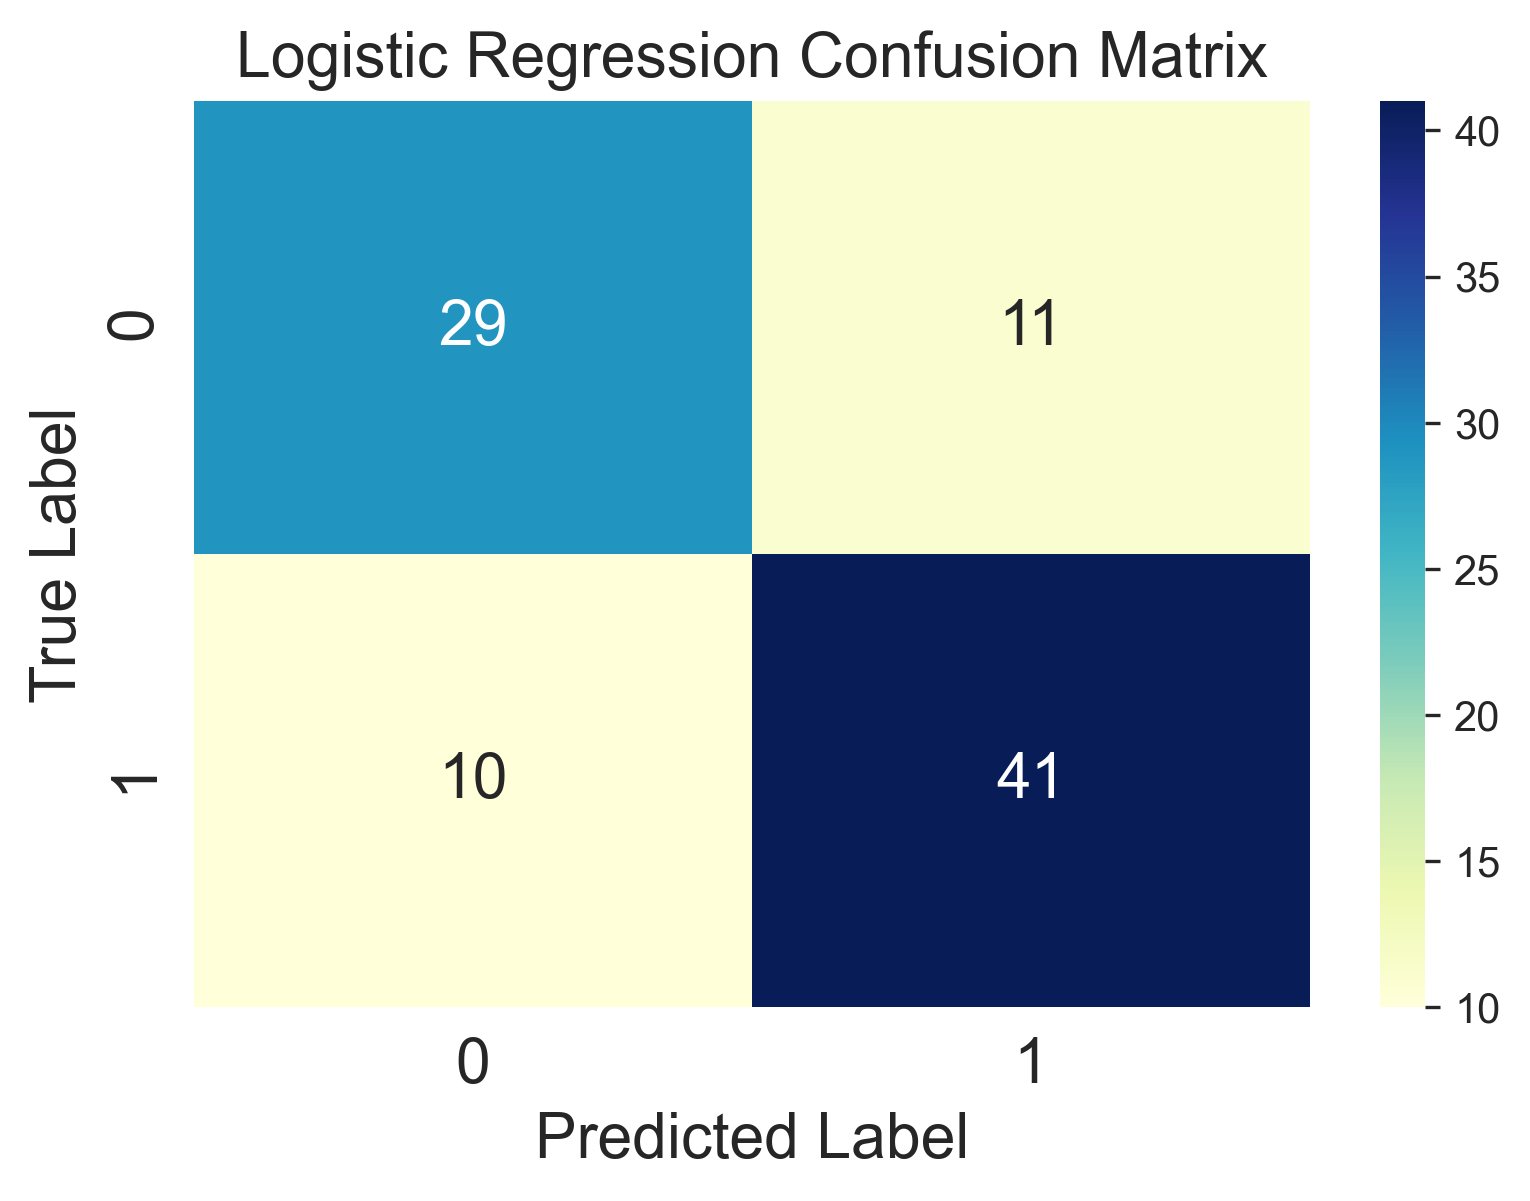

In [26]:
sns.heatmap(cm,
            cmap='YlGnBu',
            annot=True,
            annot_kws={'size': 15})
plt.title('Logistic Regression Confusion Matrix', size=15)
plt.ylabel('True Label', size=15)
plt.xlabel('Predicted Label', size=15)
plt.yticks(size=15)
plt.xticks(size=15)
plt.show()

In [27]:
lr_final_coefs_df = pd.DataFrame({'feature': list(lr_features_final.columns),
                            'coef': list(lr_final.coef_[0])})

print(lr_final_coefs_df)

   feature      coef
0      sex -0.659224
1       cp  0.793108
2    exang -0.752521
3  oldpeak -0.878103
4       ca -1.009295


In [28]:
lr_final_coefs_df['coef_abs'] = lr_final_coefs_df['coef'].abs()

lr_final_coefs_df_sorted = lr_final_coefs_df.sort_values(by='coef_abs', ascending=True)

print(lr_final_coefs_df_sorted)

   feature      coef  coef_abs
0      sex -0.659224  0.659224
2    exang -0.752521  0.752521
1       cp  0.793108  0.793108
3  oldpeak -0.878103  0.878103
4       ca -1.009295  1.009295


For predicting heart disease, the top 5 most important factors are:
1. The number of major blood vessels colored by fluoroscopy. The fewer that are visible under fluoroscopy, the higher your chances of having heart disease.
2. The ST depression induced by exercise relative to rest, visible on an ECG. Smaller ST depressions caused by exercise may be incative of heart disease.
3. Chest pain type. Patients without chest pain are less likely to have heart disease. Patients with typical chest pain are more likely to have heart disease.
4. Exercise-induced angina. Experiencing chest pain from exercise may be an indicator of heart disease.
5. Sex (male/female). Women are at a higher risk for heart disease than men.

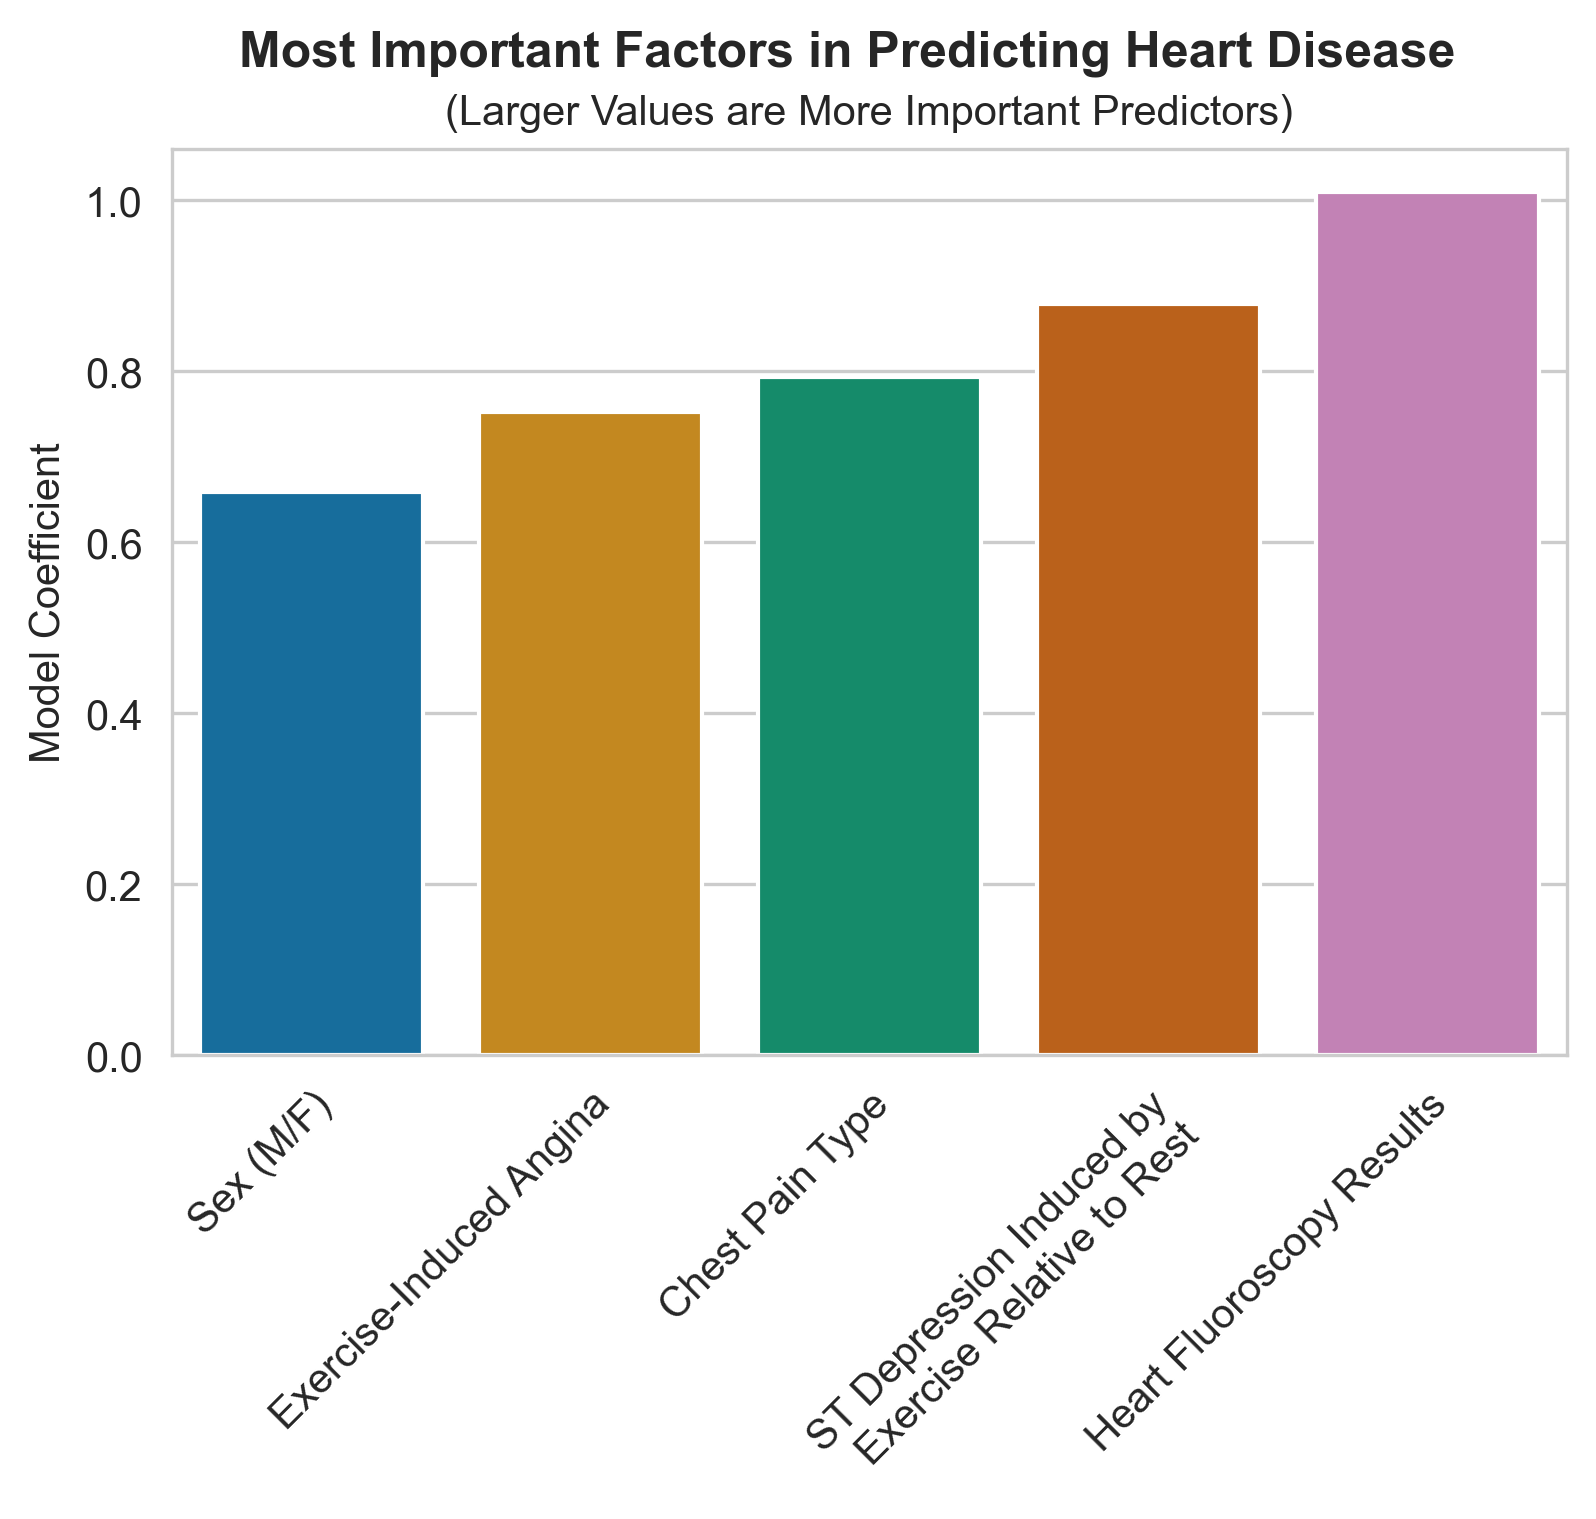

In [38]:
sns.set_palette('colorblind')

fig, ax = plt.subplots()
sns.barplot(data=lr_final_coefs_df_sorted,
            x='feature',
            y='coef_abs')
ax.set_xticklabels(['Sex (M/F)', 'Exercise-Induced Angina', 'Chest Pain Type', 'ST Depression Induced by\nExercise Relative to Rest', 'Heart Fluoroscopy Results'],
                   rotation=45,
                   rotation_mode='anchor',
                   ha='right')
plt.suptitle('Most Important Factors in Predicting Heart Disease',
             fontweight='bold',
             ha='center')
plt.title('(Larger Values are More Important Predictors)', size=10)
plt.xlabel('')
plt.ylabel('Model Coefficient')
plt.show()